# AirBnb Early Data Analysis

In [50]:
import pandas as pd

df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [52]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 1. Missing Data & Non-Value Analysis

In [53]:
# Count nulls per column to identify missing data patterns
df.isna().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

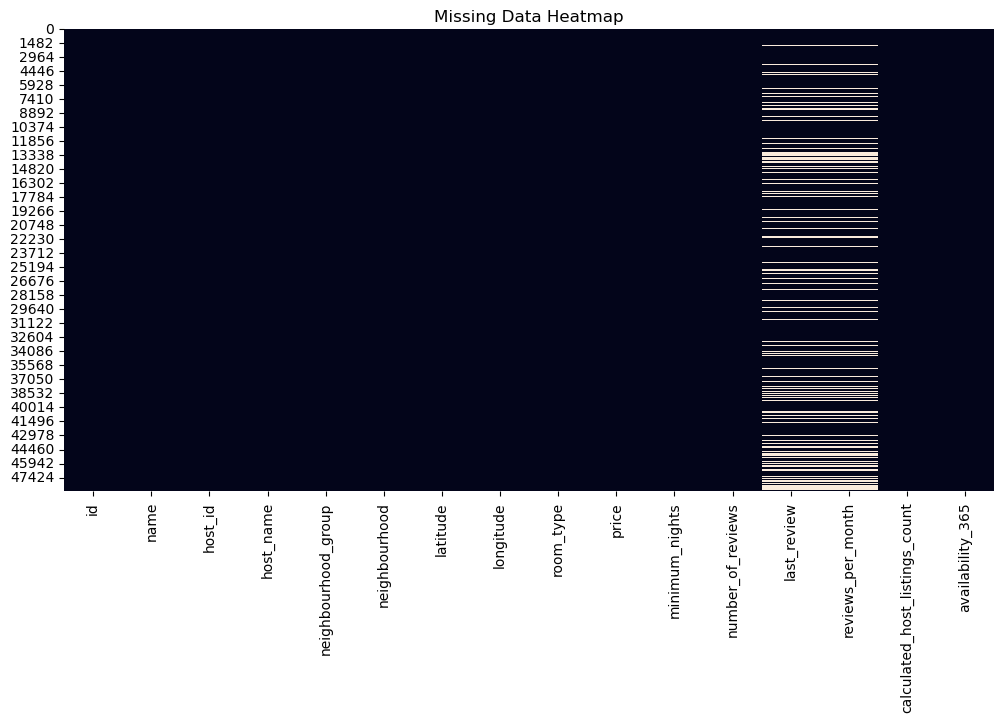

In [54]:
# Visualize missingness with a heatmap to spot patterns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

Only the last_review and its derived reviews_per_month columns have missing values; every other field is complete, so those two columns alone light up in the null‐value heatmap.

In [55]:
# Handle missing values in 'reviews_per_month' and 'last_review'

# Fill 'reviews_per_month' nulls with 0 (assume no reviews)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Convert 'last_review' to datetime, treating "No Review" and NaN as missing
df['last_review'] = pd.to_datetime(df['last_review'].replace("No Review", pd.NA), errors='coerce')

# Create a 'has_reviewed' flag (1 if reviewed, 0 if never reviewed)
df['has_reviewed'] = df['last_review'].notna().astype(int)

Filling 'reviews_per_month' nulls with 0 assumes that if there is no value, the listing has never received any reviews, so the average reviews per month should be zero. This is a common approach in Airbnb data because missing values in this column typically indicate no review activity, not missing information.

## 2. Univariate Distributions

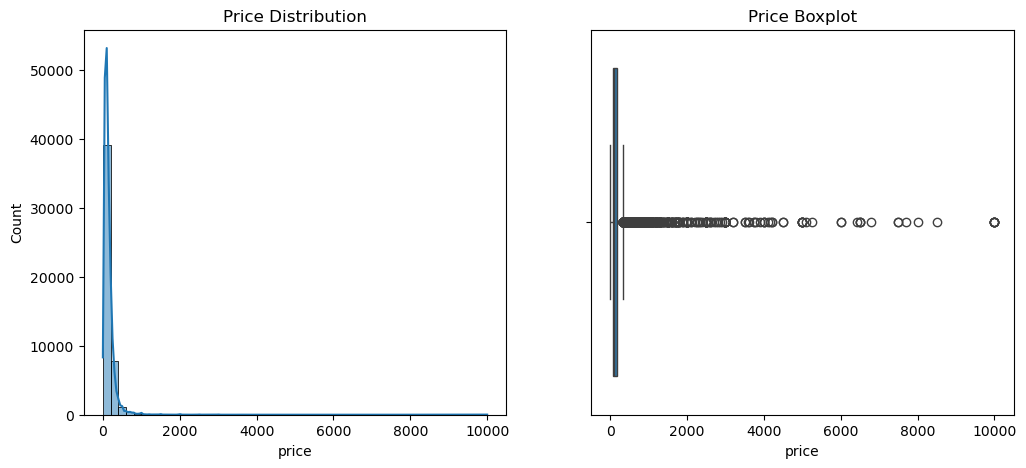

In [56]:
# Price: Histogram and boxplot (original and log scale)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title("Price Boxplot")
plt.show()

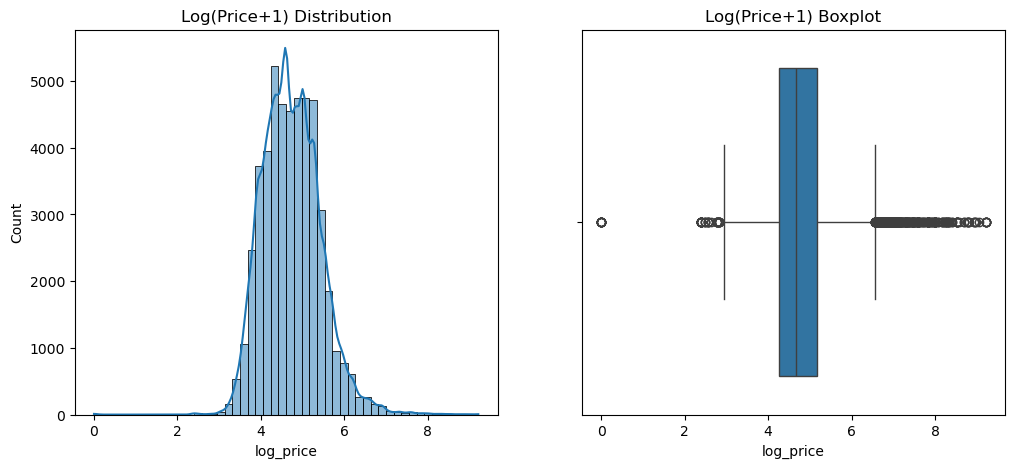

In [57]:
# Log-transform price to handle skewness
import numpy as np
df['log_price'] = np.log1p(df['price'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title("Log(Price+1) Distribution")
plt.subplot(1, 2, 2)
sns.boxplot(x=df['log_price'])
plt.title("Log(Price+1) Boxplot")
plt.show()

In [58]:
# Identify extreme outliers in price (top 1%)
price_99 = df['price'].quantile(0.99)
print(f"99th percentile of price: {price_99}")

99th percentile of price: 799.0


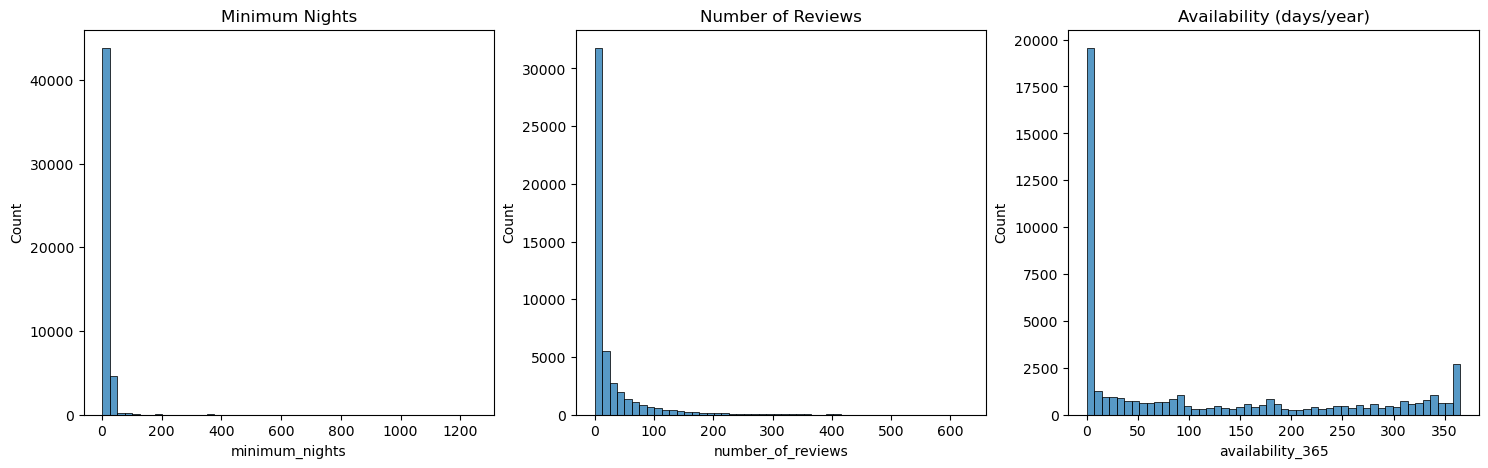

In [59]:
# Minimum Nights, Number of Reviews, Availability: Histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['minimum_nights'], bins=50, ax=axes[0])
axes[0].set_title("Minimum Nights")
sns.histplot(df['number_of_reviews'], bins=50, ax=axes[1])
axes[1].set_title("Number of Reviews")
sns.histplot(df['availability_365'], bins=50, ax=axes[2])
axes[2].set_title("Availability (days/year)")
plt.show()

## 3. Categorical Summaries

In [60]:
# Frequency counts for key categorical columns
print(df['neighbourhood_group'].value_counts())
print(df['neighbourhood'].value_counts().head())
print(df['room_type'].value_counts())

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: count, dtype: int64
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


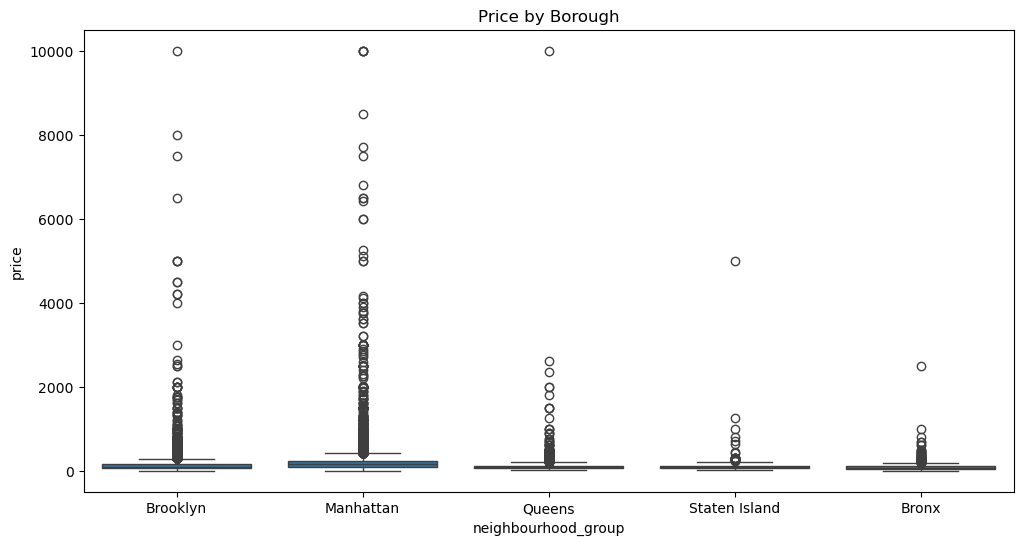

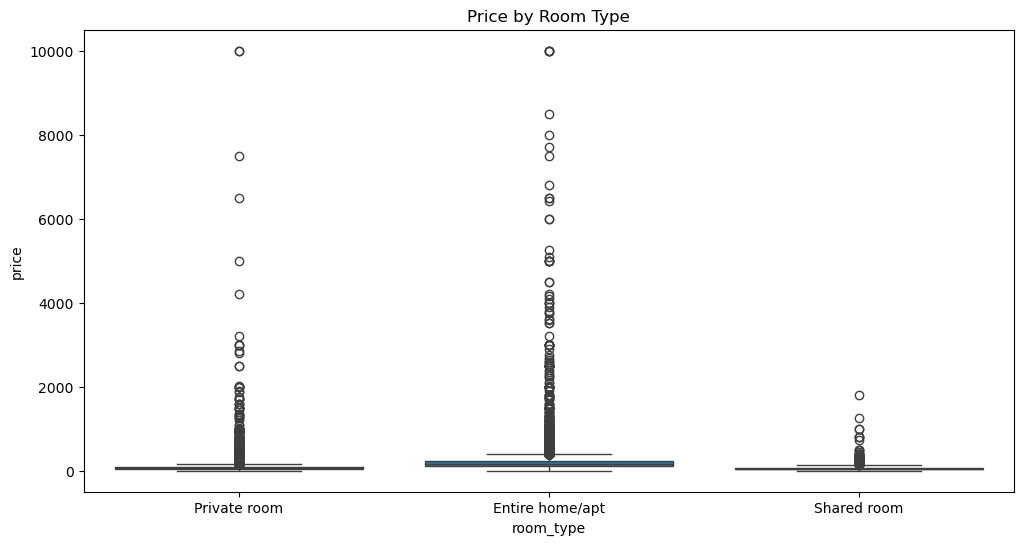

In [61]:
# Boxplots of price by neighbourhood_group and room_type
plt.figure(figsize=(12, 6))
sns.boxplot(x="neighbourhood_group", y="price", data=df)
plt.title("Price by Borough")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="room_type", y="price", data=df)
plt.title("Price by Room Type")
plt.show()

## 4. Bivariate Relationships

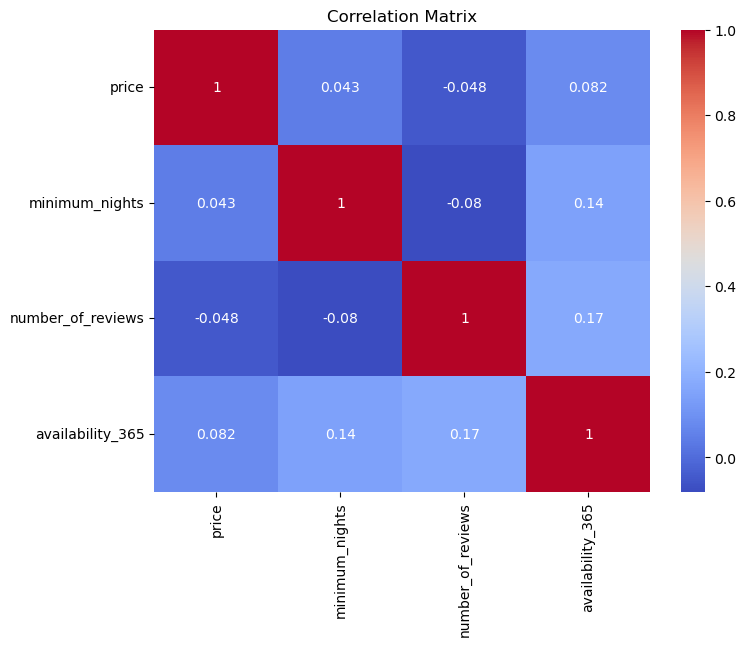

In [62]:
# Correlation matrix for numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

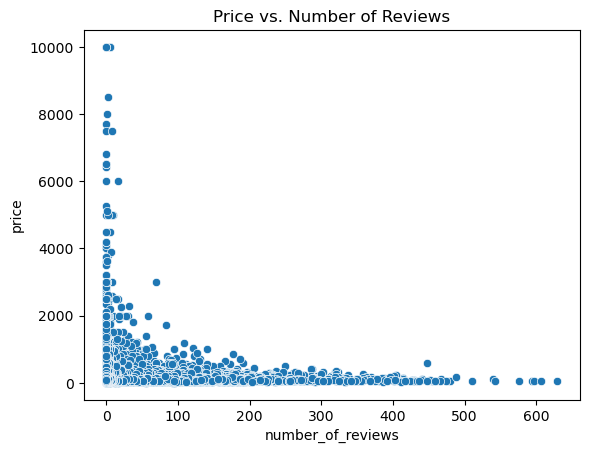

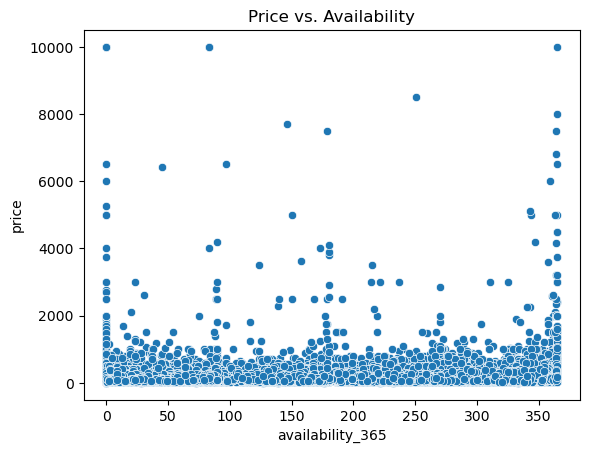

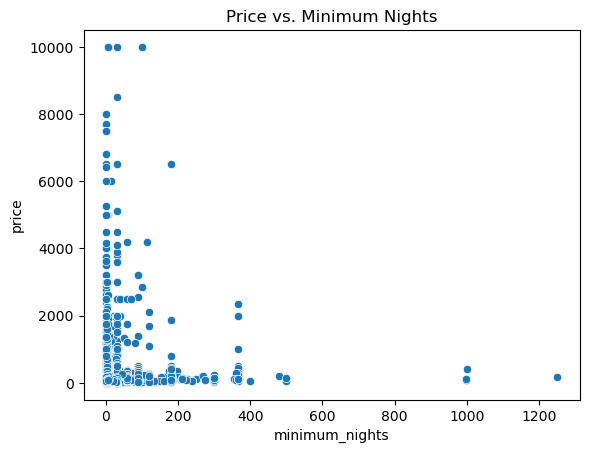

In [63]:
# Scatter plots for price vs. other variables
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title("Price vs. Number of Reviews")
plt.show()

sns.scatterplot(x='availability_365', y='price', data=df)
plt.title("Price vs. Availability")
plt.show()

sns.scatterplot(x='minimum_nights', y='price', data=df)
plt.title("Price vs. Minimum Nights")
plt.show()

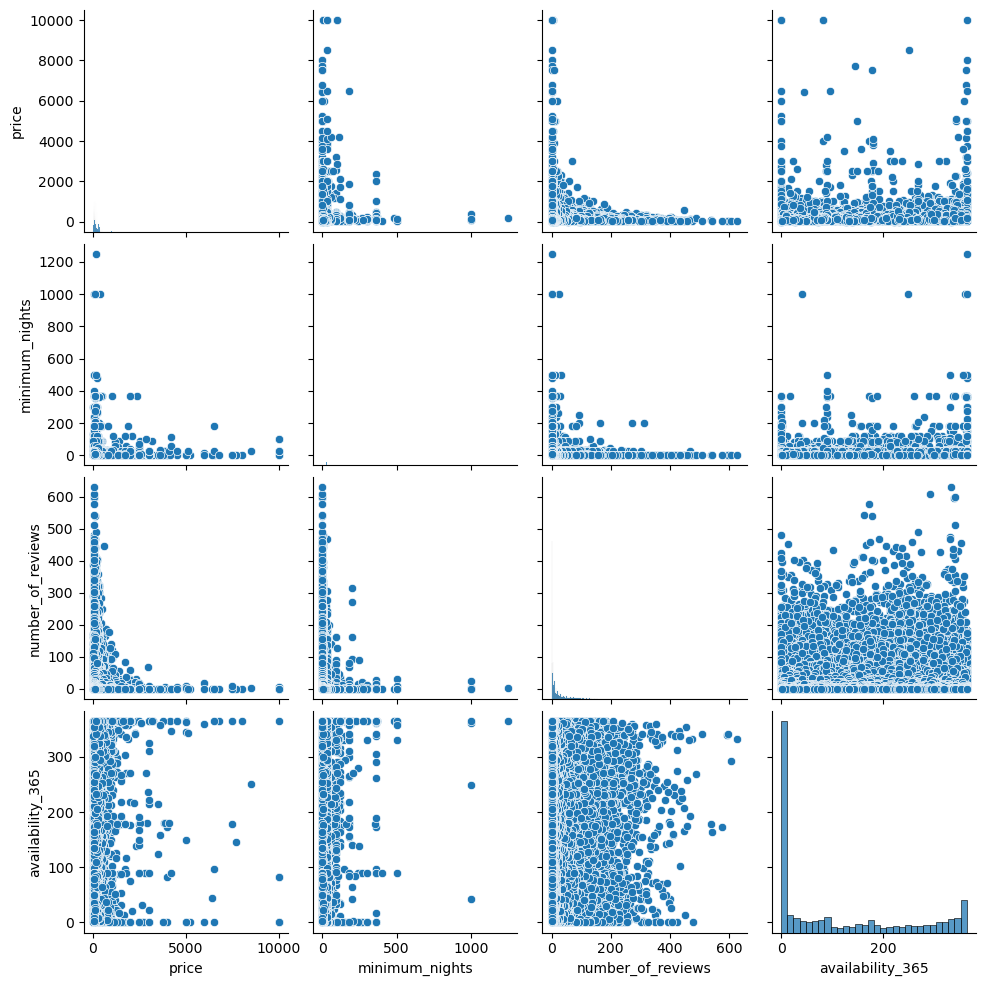

In [64]:
# Pairplot for selected features
sns.pairplot(df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']])
plt.show()

## 5. Host-Level Analysis

In [71]:
# Plot the distribution of host_listings_count
if 'host_listings_count' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['host_listings_count'], bins=30)
    plt.title("Host Listings Count Distribution")
    plt.xlabel("Number of Listings per Host")
    plt.ylabel("Frequency")
    plt.show()

    # Compare average price for hosts with 1 vs >5 listings
    df['host_type'] = np.where(df['host_listings_count'] > 5, 'Superhost (5+)', 'Regular (1-5)')
    # Boxplot of price by host_type
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='host_type', y='price', data=df)
    plt.title("Price by Host Type")
    plt.xlabel("Host Type")
    plt.ylabel("Price")
    plt.show()

## 6. Temporal Trends

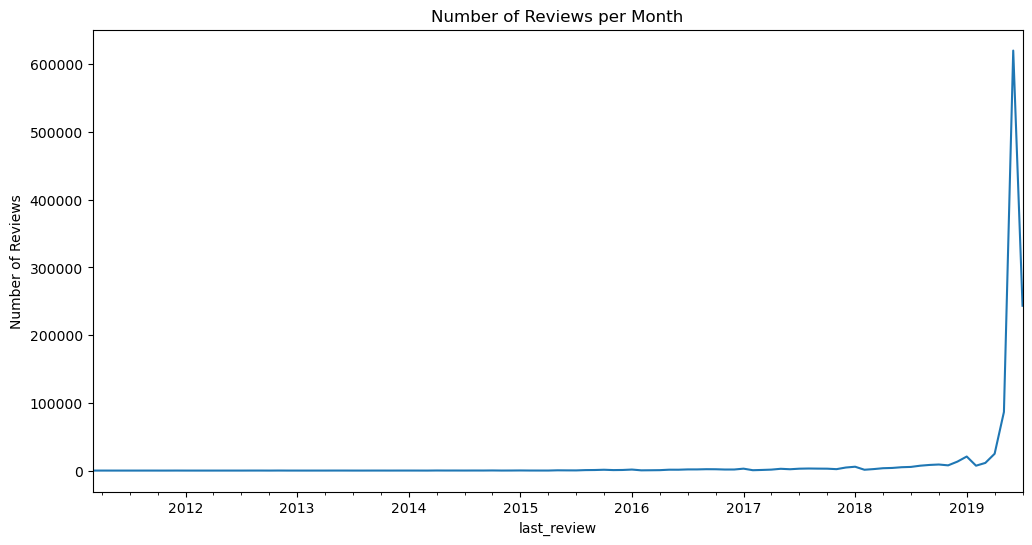

In [66]:
# Convert last_review to datetime and plot reviews per month
if df['last_review'].dtype == object:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

df.set_index('last_review', inplace=True)
monthly_reviews = df['number_of_reviews'].resample('M').sum()
monthly_reviews.plot(figsize=(12, 6), title="Number of Reviews per Month")
plt.ylabel("Number of Reviews")
plt.show()
df.reset_index(inplace=True)

In [67]:
# Folium map of listings colored by price (sample 500 for speed)
import folium
sample_df = df.sample(500, random_state=1)
m = folium.Map(location=[40.73, -73.95], zoom_start=11)
import matplotlib.cm as cm

for _, row in sample_df.iterrows():
    folium.CircleMarker(
        [row['latitude'], row['longitude']],
        radius=3,
        fill=True,
        fill_opacity=0.6,
        fill_color=cm.viridis(row['price']/df['price'].max())
    ).add_to(m)
m

In [68]:
# 8. Feature Engineering for EDA

# Occupancy rate
df['occupancy_rate'] = (365 - df['availability_365']) / 365

# Has review flag
df['has_review'] = df['last_review'].notna()

In [69]:
# 9. Outlier Detection & Treatment

# Remove/cap extreme prices (above 99th percentile)
df = df[df['price'] <= price_99]

In [70]:
# 10. Summary Tables & Dashboarding

# Pivot table: median price by neighbourhood_group and room_type
pivot = df.pivot_table('price', index='neighbourhood_group', columns='room_type', aggfunc='median')
print(pivot)

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            100            53           40
Brooklyn                         145            65           36
Manhattan                        190            90           69
Queens                           120            60           37
Staten Island                    100            50           30
